In [1]:
# functions to be imported
import sys
sys.path.insert(0, 'C:/Users/Rhydian/Documents/GitHub/Lung_Cancer_Shrinkage_vs_Erosion/python_scripts/')
import os
from mphys_project_functions import create_mask,show_slice,get_healthy_tissue_vals
import nibabel as nib
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from skimage import feature
from skimage.morphology import square
from skimage.filters import rank
import math
import scipy

0


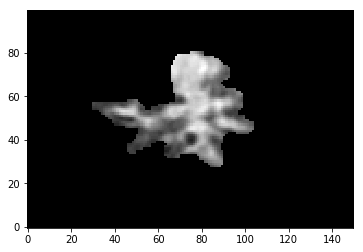

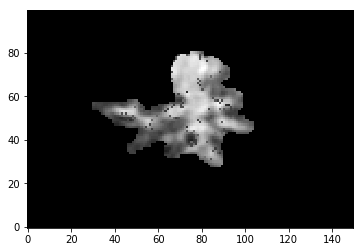

In [2]:
from mphys_project_functions import fragmenting_sim
img = nib.load("D:/fullTumourNiftys/NSCLC1_/NSCLC1__registered_OARsfullscan2.nii").get_data()
result = fragmenting_sim(img)
show_slice(img[100:200,150:300,60])
show_slice(result[100:200,150:300,60])

## Import Niftis and Generate Mask

c:\users\rhydian\appdata\local\programs\python\python35\lib\site-packages\skimage\morphology\misc.py:122: UserWarning: Only one label was provided to `remove_small_objects`. Did you mean to use a boolean array?
  warn("Only one label was provided to `remove_small_objects`. "


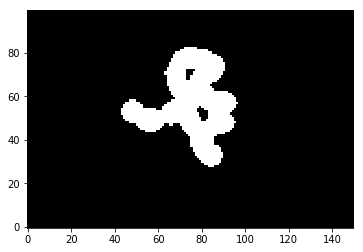

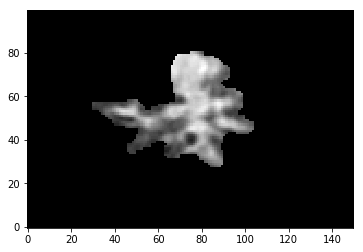

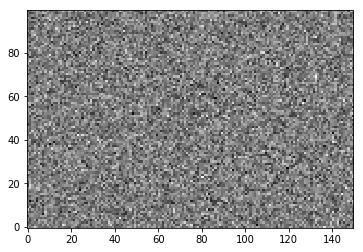

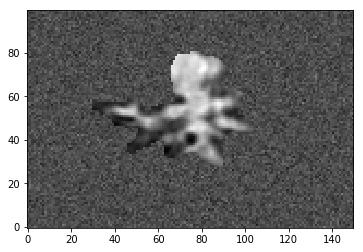

In [3]:
# import nifti containing delineated region of tumour
img = nib.load("D:/fullTumourNiftys/NSCLC1_/NSCLC1__registered_OARsfullscan2.nii").get_data()
# ther
mask = create_mask(img,sigma = 0.5, small_obj_size = 20, radius_of_mask=4 )
show_slice(mask[100:200,150:300,60])
show_slice(img[100:200,150:300,60])
noise = np.random.normal(loc=400, scale=50, size=img.shape)
show_slice(noise[100:200,150:300,60])
img[img == 0] = noise[img== 0]
show_slice(img[100:200,150:300,60])

## Fill in holes in Mask. Save this as filled_mask

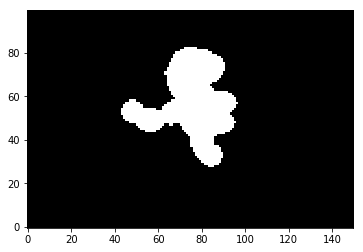

In [4]:
filled_mask = np.zeros(np.shape(mask))
for i in range(filled_mask.shape[2]):
    filled_mask[:,:,i] = scipy.ndimage.binary_fill_holes(mask[:,:,i])
    
show_slice(filled_mask[100:200,150:300,60])


## Get Gradient of scan

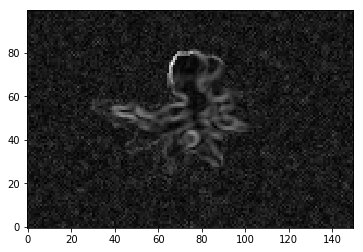

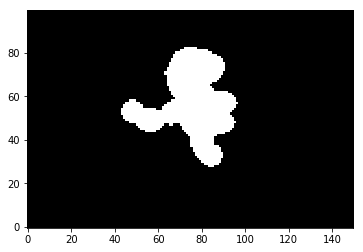

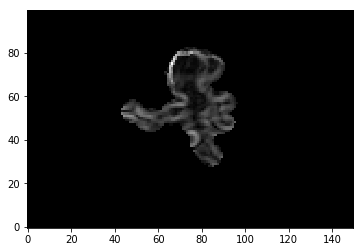

In [5]:
def get_3D_grad_matrix(matrix):
    grad_list = np.gradient(img)
    grad = np.sqrt(np.multiply(grad_list[0], grad_list[0]) + np.multiply(grad_list[1], grad_list[1]) + np.multiply(grad_list[2], grad_list[2]))
    return grad

gradient_of_tumour = get_3D_grad_matrix(img)

show_slice(gradient_of_tumour[100:200,150:300,60])
show_slice(filled_mask[100:200,150:300,60])
ROI = np.multiply(gradient_of_tumour, filled_mask)
show_slice(ROI[100:200,150:300,60])



## Choose probabilistically which pixels to remove from the mask

[0.87693765 0.94734516 0.66719747 ... 0.72143691 0.56582618 0.78670355]


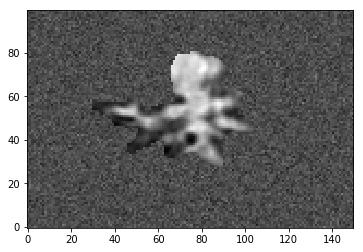

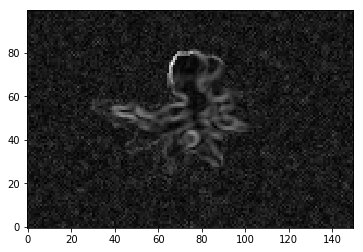

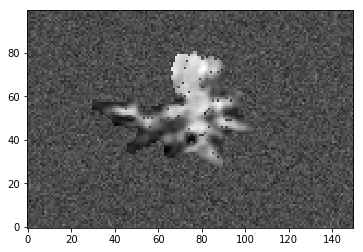

In [6]:
gradients = gradient_of_tumour[filled_mask>0]
normalised_gradients = gradients/gradients.max()
random_samples = np.random.triangular(0, 0.8, 1, size=gradients.shape)
print(random_samples)
removed_pixels = np.ones(gradients.shape)
removed_pixels[normalised_gradients > random_samples] = 0

pixel_remover = np.ones(img.shape)
pixel_remover[filled_mask > 0] = removed_pixels
result = np.multiply(pixel_remover,img)
result[result == 0] = np.random.normal(loc=400, scale=50, size=result[result == 0].shape)
show_slice(img[100:200,150:300,60])
show_slice(gradient_of_tumour[100:200,150:300,60])
show_slice(result[100:200,150:300,60])